# Recommendation System

# Importing Library

code di bawah melakukan importing library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from datetime import datetime

now = datetime.now()

from sklearn.model_selection import train_test_split

from sklearn import preprocessing as pp
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import log_loss
from sklearn.metrics import precision_recall_curve, average_precision_score
from sklearn.metrics import roc_curve, auc, roc_auc_score, mean_squared_error

import tensorflow as tf
import keras

from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Activation, Dense, Dropout
from tensorflow.keras.layers import BatchNormalization, Input, Lambda
from tensorflow.keras.layers import Embedding, Flatten, dot, Dot
from tensorflow.keras import regularizers
from tensorflow.keras.losses import mse, binary_crossentropy
from tensorflow.keras.callbacks import EarlyStopping

# Data Understanding

code di bawah melakukan pembacaan terhadap data dan menunjukkan informasi mengenai data

In [3]:
movies = pd.read_csv('ml-latest-small/movies.csv')
tags = pd.read_csv('ml-latest-small/tags.csv')
links = pd.read_csv('ml-latest-small/links.csv')
ratings = pd.read_csv('ml-latest-small/ratings.csv')

In [3]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9742 entries, 0 to 9741
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieId  9742 non-null   int64 
 1   title    9742 non-null   object
 2   genres   9742 non-null   object
dtypes: int64(1), object(2)
memory usage: 228.5+ KB


In [4]:
tags.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3683 entries, 0 to 3682
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   userId     3683 non-null   int64 
 1   movieId    3683 non-null   int64 
 2   tag        3683 non-null   object
 3   timestamp  3683 non-null   int64 
dtypes: int64(3), object(1)
memory usage: 115.2+ KB


In [5]:
links.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9742 entries, 0 to 9741
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   movieId  9742 non-null   int64  
 1   imdbId   9742 non-null   int64  
 2   tmdbId   9734 non-null   float64
dtypes: float64(1), int64(2)
memory usage: 228.5 KB


In [6]:
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100836 entries, 0 to 100835
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   userId     100836 non-null  int64  
 1   movieId    100836 non-null  int64  
 2   rating     100836 non-null  float64
 3   timestamp  100836 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 3.1 MB


In [7]:
print('jumlah film tersedia dalam dataset: ', len(movies.movieId.unique()))
print('jumlah link based movies ID: ', len(links.movieId.unique()))
print('jumlah tags based movies ID: ', len(tags.movieId.unique()))
print('jumlah rating based movies ID: ', len(ratings.movieId.unique()))
print('jumlah tags per user: ', len(tags.userId.unique()))
print('jumlah rating per user: ', len(ratings.userId.unique()))

jumlah film tersedia dalam dataset:  9742
jumlah link based movies ID:  9742
jumlah tags based movies ID:  1572
jumlah rating based movies ID:  9724
jumlah tags per user:  58
jumlah rating per user:  610


# Univariate EDA

Code di bawah melakukan EDA terhadap data yang akan digunakan

In [8]:
print("banyak genre dari movies: ", len(movies.genres.unique()))

banyak genre dari movies:  951


In [9]:
print("banyak tag dari movies: ", len(tags.tag.unique()))
print("jenis tag dari movies: ", tags.tag.unique())

banyak tag dari movies:  1589
jenis tag dari movies:  ['funny' 'Highly quotable' 'will ferrell' ... 'gun fu' 'heroic bloodshed'
 'Heroic Bloodshed']


In [10]:
print("banyak rating dari movies: ", len(ratings.rating.unique()))
print("jenis rating dari movies: ", ratings.rating.unique())

banyak rating dari movies:  10
jenis rating dari movies:  [4.  5.  3.  2.  1.  4.5 3.5 2.5 0.5 1.5]


In [4]:
df_movie_rate_merge = pd.merge(ratings, movies, on='movieId', how='left')

In [5]:
df_movie_rate_merge

,userId,movieId,rating,timestamp,title,genres
0,1,1,4.0,964982703,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,1,3,4.0,964981247,Grumpier Old Men (1995),Comedy|Romance
2,1,6,4.0,964982224,Heat (1995),Action|Crime|Thriller
3,1,47,5.0,964983815,Seven (a.k.a. Se7en) (1995),Mystery|Thriller
4,1,50,5.0,964982931,"Usual Suspects, The (1995)",Crime|Mystery|Thriller
...,...,...,...,...,...,...
100831,610,166534,4.0,1493848402,Split (2017),Drama|Horror|Thriller
100832,610,168248,5.0,1493850091,John Wick: Chapter Two (2017),Action|Crime|Thriller
100833,610,168250,5.0,1494273047,Get Out (2017),Horror
100834,610,168252,5.0,1493846352,Logan (2017),Action|Sci-Fi


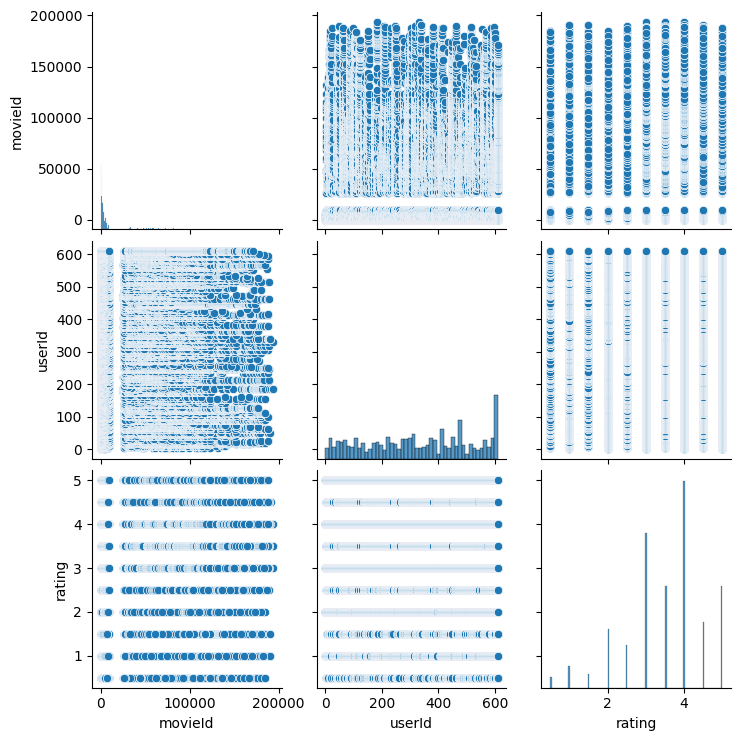

In [6]:
sns.pairplot(df_movie_rate_merge[['movieId','userId','rating']])

## Movies

pada data di bawah dapat diketahui bahwa di dalam data movies film emma (1996) memiliki data paling banyak dengan jumlah 1053

In [11]:
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [12]:
movies.describe(include=object)

,title,genres
count,9742,9742
unique,9737,951
top,Emma (1996),Drama
freq,2,1053


## Ratings

Pada data di bawah dapat diketahui bahwa nilai minimal rating 0.5 dan paling tinggi 5

In [13]:
ratings.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [14]:
ratings.describe()

,userId,movieId,rating,timestamp
count,100836.000000,100836.000000,100836.000000,1.008360e+05
mean,326.127564,19435.295718,3.501557,1.205946e+09
std,182.618491,35530.987199,1.042529,2.162610e+08
min,1.000000,1.000000,0.500000,8.281246e+08
25%,177.000000,1199.000000,3.000000,1.019124e+09
50%,325.000000,2991.000000,3.500000,1.186087e+09
75%,477.000000,8122.000000,4.000000,1.435994e+09
max,610.000000,193609.000000,5.000000,1.537799e+09


## Links

In [15]:
links.head()

,movieId,imdbId,tmdbId
0,1,114709,862.0
1,2,113497,8844.0
2,3,113228,15602.0
3,4,114885,31357.0
4,5,113041,11862.0


In [16]:
links.describe()

,movieId,imdbId,tmdbId
count,9742.000000,9.742000e+03,9734.000000
mean,42200.353623,6.771839e+05,55162.123793
std,52160.494854,1.107228e+06,93653.481487
min,1.000000,4.170000e+02,2.000000
25%,3248.250000,9.518075e+04,9665.500000
50%,7300.000000,1.672605e+05,16529.000000
75%,76232.000000,8.055685e+05,44205.750000
max,193609.000000,8.391976e+06,525662.000000


## Tags

Pada data di bawah dapat diketahui bahwa data tags paling banyak adalah in netflix queue dengan total 131, data ini mungkin mengartikan bahwa user melakukan tag antrian terhadap suatu film pada platform netflix

In [17]:
tags.head()

,userId,movieId,tag,timestamp
0,2,60756,funny,1445714994
1,2,60756,Highly quotable,1445714996
2,2,60756,will ferrell,1445714992
3,2,89774,Boxing story,1445715207
4,2,89774,MMA,1445715200


In [18]:
tags.describe(include=object)

,tag
count,3683
unique,1589
top,In Netflix queue
freq,131


# Data preprocessing

Pada tahap ini dilakukan penggabungan data dan pemrosesan terhadap data agar data dapat diolah.

In [19]:
movies_all = np.concatenate((
    movies.movieId.unique(),
    links.movieId.unique(),
    tags.movieId.unique(),
    ratings.movieId.unique()
))

movies_all = np.sort(np.unique(movies_all))

print("jumlah seluruh data movies based movieId: ", len(movies_all))

jumlah seluruh data movies based movieId:  9742


In [20]:
user_all = np.concatenate((
    ratings.userId.unique(),
    tags.userId.unique()
))

user_all = np.sort(np.unique(user_all))

print("jumlah seluruh data user : ", len(user_all))

jumlah seluruh data user :  610


In [21]:
movies_df = pd.merge(tags, movies, on='movieId', how='left')
movies_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3683 entries, 0 to 3682
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   userId     3683 non-null   int64 
 1   movieId    3683 non-null   int64 
 2   tag        3683 non-null   object
 3   timestamp  3683 non-null   int64 
 4   title      3683 non-null   object
 5   genres     3683 non-null   object
dtypes: int64(3), object(3)
memory usage: 201.4+ KB


In [22]:
movies_df = pd.merge(ratings.drop(['userId','timestamp'],axis=1), movies_df, on='movieId', how='left')
movies_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 285762 entries, 0 to 285761
Data columns (total 7 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   movieId    285762 non-null  int64  
 1   rating     285762 non-null  float64
 2   userId     233213 non-null  float64
 3   tag        233213 non-null  object 
 4   timestamp  233213 non-null  float64
 5   title      233213 non-null  object 
 6   genres     233213 non-null  object 
dtypes: float64(3), int64(1), object(3)
memory usage: 17.4+ MB


In [23]:
movies_df.head()

,movieId,rating,userId,tag,timestamp,title,genres
0,1,4.0,336.0,pixar,1.139046e+09,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,1,4.0,474.0,pixar,1.137207e+09,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
2,1,4.0,567.0,fun,1.525286e+09,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
3,3,4.0,289.0,moldy,1.143425e+09,Grumpier Old Men (1995),Comedy|Romance
4,3,4.0,289.0,old,1.143425e+09,Grumpier Old Men (1995),Comedy|Romance


In [24]:
movies_df.shape

(285762, 7)

In [25]:
movies_df.isnull().sum()

movieId          0
rating           0
userId       52549
tag          52549
timestamp    52549
title        52549
genres       52549
dtype: int64

In [26]:
movies_df.dropna(inplace=True)
movies_df.shape

(233213, 7)

In [27]:
movies_df.isnull().sum()

movieId      0
rating       0
userId       0
tag          0
timestamp    0
title        0
genres       0
dtype: int64

In [28]:
fix_movies = movies_df.sort_values('movieId', ascending=True)
fix_movies

,movieId,rating,userId,tag,timestamp,title,genres
0,1,4.0,336.0,pixar,1.139046e+09,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
121430,1,5.0,336.0,pixar,1.139046e+09,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
121431,1,5.0,474.0,pixar,1.137207e+09,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
121432,1,5.0,567.0,fun,1.525286e+09,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
35190,1,4.5,567.0,fun,1.525286e+09,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
...,...,...,...,...,...,...,...
263644,187595,5.0,62.0,star wars,1.528935e+09,Solo: A Star Wars Story (2018),Action|Adventure|Children|Sci-Fi
81531,193565,3.5,184.0,anime,1.537099e+09,Gintama: The Movie (2010),Action|Animation|Comedy|Sci-Fi
81532,193565,3.5,184.0,comedy,1.537099e+09,Gintama: The Movie (2010),Action|Animation|Comedy|Sci-Fi
81534,193565,3.5,184.0,remaster,1.537099e+09,Gintama: The Movie (2010),Action|Animation|Comedy|Sci-Fi


In [29]:
len(fix_movies.movieId.unique())

1554

In [30]:
fix_movies.drop('tag',axis=1, inplace=True)

In [31]:
preparation = fix_movies
preparation = preparation.drop_duplicates('movieId')
preparation

,movieId,rating,userId,timestamp,title,genres
0,1,4.0,336.0,1.139046e+09,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
187260,2,3.0,62.0,1.528844e+09,Jumanji (1995),Adventure|Children|Fantasy
106951,3,4.0,289.0,1.143425e+09,Grumpier Old Men (1995),Comedy|Romance
19921,5,3.0,474.0,1.137374e+09,Father of the Bride Part II (1995),Comedy
115692,7,3.0,474.0,1.137376e+09,Sabrina (1995),Comedy|Romance
...,...,...,...,...,...,...
27632,183611,4.0,62.0,1.526245e+09,Game Night (2018),Action|Comedy|Crime|Horror
174264,184471,3.0,62.0,1.528025e+09,Tomb Raider (2018),Action|Adventure|Fantasy
44721,187593,5.0,62.0,1.527274e+09,Deadpool 2 (2018),Action|Comedy|Sci-Fi
263643,187595,5.0,62.0,1.528935e+09,Solo: A Star Wars Story (2018),Action|Adventure|Children|Sci-Fi


In [32]:
movie_id = preparation['movieId'].tolist()
title_movie = preparation['title'].tolist()
rating_movie = preparation['rating'].tolist()
genres_movie = preparation['genres'].tolist()

In [33]:
movie_new = pd.DataFrame({
    'id':movie_id,
    'title':title_movie,
    'genre':genres_movie,
    'rating':rating_movie
})

movie_new

,id,title,genre,rating
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,4.0
1,2,Jumanji (1995),Adventure|Children|Fantasy,3.0
2,3,Grumpier Old Men (1995),Comedy|Romance,4.0
3,5,Father of the Bride Part II (1995),Comedy,3.0
4,7,Sabrina (1995),Comedy|Romance,3.0
...,...,...,...,...
1549,183611,Game Night (2018),Action|Comedy|Crime|Horror,4.0
1550,184471,Tomb Raider (2018),Action|Adventure|Fantasy,3.0
1551,187593,Deadpool 2 (2018),Action|Comedy|Sci-Fi,5.0
1552,187595,Solo: A Star Wars Story (2018),Action|Adventure|Children|Sci-Fi,5.0


# Model Development Content Based Filtering

Pada tahap ini merupakan tahap membuat sistem rekomendasi menggunakan content based filtering

# Vectorizing the data

Tahap ini dilakukan vektorirasi terhadap data

In [34]:
genres = movie_new["genre"].str.get_dummies(sep="|")
movie_genres = pd.concat([movie_new['title'], genres], axis=1)
movie_genres

,title,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,...,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,Toy Story (1995),0,0,1,1,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Jumanji (1995),0,0,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Grumpier Old Men (1995),0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,Father of the Bride Part II (1995),0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Sabrina (1995),0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1549,Game Night (2018),0,1,0,0,0,1,1,0,0,...,0,1,0,0,0,0,0,0,0,0
1550,Tomb Raider (2018),0,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1551,Deadpool 2 (2018),0,1,0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1552,Solo: A Star Wars Story (2018),0,1,1,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [35]:
movie_genres.drop('(no genres listed)',axis=1,inplace=True)

## Cosine Similarity

Tahap ini melakukan perhitungan kesamaan kosinus menggunakan library sklearn

In [36]:
from sklearn.metrics.pairwise import cosine_similarity

In [37]:
cs = cosine_similarity(np.array(genres))
cs

array([[1.        , 0.77459667, 0.31622777, ..., 0.25819889, 0.4472136 ,
        0.4472136 ],
       [0.77459667, 1.        , 0.        , ..., 0.        , 0.57735027,
        0.        ],
       [0.31622777, 0.        , 1.        , ..., 0.40824829, 0.        ,
        0.35355339],
       ...,
       [0.25819889, 0.        , 0.40824829, ..., 1.        , 0.57735027,
        0.8660254 ],
       [0.4472136 , 0.57735027, 0.        , ..., 0.57735027, 1.        ,
        0.5       ],
       [0.4472136 , 0.        , 0.35355339, ..., 0.8660254 , 0.5       ,
        1.        ]])

In [38]:
cosine_sim_df = pd.DataFrame(cs, index=movie_new['title'], columns=movie_new['title'])
print('shape: ', cosine_sim_df.shape)

cosine_sim_df.sample(5, axis=1).sample(10, axis=0)

shape:  (1554, 1554)


title,"Clockwork Orange, A (1971)",Twelve Monkeys (a.k.a. 12 Monkeys) (1995),America's Sweethearts (2001),Miller's Crossing (1990),Born Yesterday (1950)
title,,,,,
"Day the Earth Stood Still, The (1951)",0.866025,0.666667,0.000000,0.577350,0.000000
Infernal Affairs (Mou gaan dou) (2002),0.866025,0.333333,0.000000,0.866025,0.000000
Green Lantern (2011),0.288675,0.333333,0.000000,0.000000,0.000000
In the Bleak Midwinter (1995),0.353553,0.000000,0.500000,0.353553,0.707107
"They Shoot Horses, Don't They? (1969)",0.500000,0.000000,0.000000,0.500000,0.000000
Birdman of Alcatraz (1962),0.500000,0.000000,0.000000,0.500000,0.000000
Cinderella (1950),0.000000,0.000000,0.316228,0.000000,0.000000
Bug (2007),0.577350,0.333333,0.000000,0.577350,0.000000
Searching for Bobby Fischer (1993),0.500000,0.000000,0.000000,0.500000,0.000000


code di bawah menunjukkan fungsi untuk melakukan rekomendasi dan hasil dari rekomendasi

In [39]:
def movie_recommendations(title, similarity_data=cosine_sim_df, items=movie_new[['title', 'genre']], k=5):
    index = similarity_data.loc[:,title].to_numpy().argpartition(
        range(-1, -k, -1))
    
    closest = similarity_data.columns[index[-1:-(k+2):-1]]
    
    closest = closest.drop(title, errors='ignore')
 
    return pd.DataFrame(closest).merge(items).head(k)

In [44]:
movie_new[movie_new.title.eq('Secrets & Lies (1996)')]

,id,title,genre,rating
251,1041,Secrets & Lies (1996),Drama,4.0


In [45]:
movie_recommendations('Secrets & Lies (1996)')

,title,genre
0,Friendly Persuasion (1956),Drama
1,"Gospel According to St. Matthew, The (Vangelo ...",Drama
2,Lost Horizon (1937),Drama
3,Ikiru (1952),Drama
4,Luther (2003),Drama


# Data Preparation collaborative filtering

Pada tahap ini dilakukan pemrosesan untuk collaborative filtering

In [4]:
ratings = pd.merge(movies.drop('genres',axis=1), ratings, on='movieId', how='left')
ratings

,movieId,title,userId,rating,timestamp
0,1,Toy Story (1995),1.0,4.0,9.649827e+08
1,1,Toy Story (1995),5.0,4.0,8.474350e+08
2,1,Toy Story (1995),7.0,4.5,1.106636e+09
3,1,Toy Story (1995),15.0,2.5,1.510578e+09
4,1,Toy Story (1995),17.0,4.5,1.305696e+09
...,...,...,...,...,...
100849,193581,Black Butler: Book of the Atlantic (2017),184.0,4.0,1.537109e+09
100850,193583,No Game No Life: Zero (2017),184.0,3.5,1.537110e+09
100851,193585,Flint (2017),184.0,3.5,1.537110e+09
100852,193587,Bungo Stray Dogs: Dead Apple (2018),184.0,3.5,1.537110e+09


In [5]:
ratings['userId'] = ratings['userId'].astype(float)
ratings['movieId'] = ratings['movieId'].astype(str).astype(int)
ratings['rating'] = ratings['rating'].astype(str).astype(float)
ratings['timestamp'] = ratings['timestamp'].apply(lambda x: now.strftime("%m/%d/%Y, %H:%M:%S"))
ratings

,movieId,title,userId,rating,timestamp
0,1,Toy Story (1995),1.0,4.0,"02/04/2023, 18:46:29"
1,1,Toy Story (1995),5.0,4.0,"02/04/2023, 18:46:29"
2,1,Toy Story (1995),7.0,4.5,"02/04/2023, 18:46:29"
3,1,Toy Story (1995),15.0,2.5,"02/04/2023, 18:46:29"
4,1,Toy Story (1995),17.0,4.5,"02/04/2023, 18:46:29"
...,...,...,...,...,...
100849,193581,Black Butler: Book of the Atlantic (2017),184.0,4.0,"02/04/2023, 18:46:29"
100850,193583,No Game No Life: Zero (2017),184.0,3.5,"02/04/2023, 18:46:29"
100851,193585,Flint (2017),184.0,3.5,"02/04/2023, 18:46:29"
100852,193587,Bungo Stray Dogs: Dead Apple (2018),184.0,3.5,"02/04/2023, 18:46:29"


In [6]:
number_users = ratings['userId'].unique().shape[0]
number_movies = ratings['movieId'].unique().shape[0]
number_ratings = len(ratings)
avg_ratings_per_user = number_ratings/number_users

In [118]:
print('Number unique users: ', number_users)
print('Number unique movies: ', number_movies)
print('Number total ratings: ', number_ratings)
print('Average number ratings per user: ', avg_ratings_per_user)

Number unique users:  611
Number unique movies:  9742
Number total ratings:  100854
Average number ratings per user:  165.06382978723406


In [119]:
movieId = ratings.groupby("movieId").count().sort_values(by="rating",ascending=False)[0:1000].index
ratings_new = ratings[ratings.movieId.isin(movieId)]
ratings_new.count()

movieId      61256
title        61256
userId       61256
rating       61256
timestamp    61256
dtype: int64

In [120]:
ratings_new.shape

(61256, 5)

In [121]:
userId = ratings_new.groupby("userId").count().sort_values(by="rating",ascending=False).sample(n=500, random_state=42).index
ratings_new_cop = ratings_new[ratings_new.userId.isin(userId)]
ratings_new_cop.count()

movieId      49571
title        49571
userId       49571
rating       49571
timestamp    49571
dtype: int64

## Generate New Id for movie and user

Pada tahap ini dilakukan pembuatan identifier baru atau biasa disebut encoding

In [122]:
movies = ratings_new_cop['movieId'].unique()
moviesDF = pd.DataFrame(data=movies,columns=['originalMovieId'])
moviesDF['newMovieId'] = moviesDF.index+1

In [123]:
users = ratings_new_cop['userId'].unique()
usersDF = pd.DataFrame(data=users,columns=['originalUserId'])
usersDF['newUserId'] = usersDF.index+1

In [124]:
ratings_new_cop = ratings_new_cop.merge(moviesDF,left_on='movieId',right_on='originalMovieId')
ratings_new_cop.drop(labels='originalMovieId', axis=1, inplace=True)
ratings_new_cop = ratings_new_cop.merge(usersDF,left_on='userId',right_on='originalUserId')
ratings_new_cop.drop(labels='originalUserId', axis=1, inplace=True)

In [125]:
number_users = ratings_new_cop.userId.unique().shape[0]
number_movies = ratings_new_cop.movieId.unique().shape[0]
number_ratings = len(ratings_new_cop)
avg_ratings_per_user = number_ratings/number_users

print('Number of unique users: ', number_users)
print('Number of unique movies: ', number_movies)
print('Number of total ratings: ', number_ratings)
print('Average number of ratings per user: ', avg_ratings_per_user)

Number of unique users:  500
Number of unique movies:  1000
Number of total ratings:  49571
Average number of ratings per user:  99.142


In [126]:
throwback_df = ratings_new_cop
throwback_df

,movieId,title,userId,rating,timestamp,newMovieId,newUserId
0,1,Toy Story (1995),7.0,4.5,"02/04/2023, 15:38:00",1,1
1,50,"Usual Suspects, The (1995)",7.0,4.5,"02/04/2023, 15:38:00",26,1
2,58,"Postman, The (Postino, Il) (1994)",7.0,3.0,"02/04/2023, 15:38:00",28,1
3,150,Apollo 13 (1995),7.0,4.5,"02/04/2023, 15:38:00",42,1
4,165,Die Hard: With a Vengeance (1995),7.0,4.0,"02/04/2023, 15:38:00",49,1
...,...,...,...,...,...,...,...
49566,8533,"Notebook, The (2004)",578.0,5.0,"02/04/2023, 15:38:00",787,500
49567,45720,"Devil Wears Prada, The (2006)",578.0,4.5,"02/04/2023, 15:38:00",849,500
49568,73017,Sherlock Holmes (2009),578.0,5.0,"02/04/2023, 15:38:00",923,500
49569,76251,Kick-Ass (2010),578.0,4.5,"02/04/2023, 15:38:00",927,500


## Splitting the data

Pada tahap ini data dibagi 20% untuk testing dan 80% untuk training

In [127]:
X_train, X_test = train_test_split(ratings_new_cop.drop('title',axis=1), test_size=0.20, shuffle=True, random_state=42)
X_validation, X_test = train_test_split(X_test, test_size=0.50, shuffle=True, random_state=42)

In [128]:
print('train set:', X_train.shape)
print('validation set:',X_validation.shape)
print('test set: ',X_test.shape)

train set: (39656, 6)
validation set: (4957, 6)
test set:  (4958, 6)


## Melakukan pengecekan sparsity

Pada tahap dilakukan pengecekan sparsity pada data dan dapat diketahui bahwa untuk data train sparsity dimiliki sebesar 7.93%

In [129]:
ratings_train = np.zeros((number_users, number_movies))
for row in X_train.itertuples():
    ratings_train[row[6]-1, row[5]-1] = row[3]

In [130]:
sparsity = float(len(ratings_train.nonzero()[0]))
sparsity /= (ratings_train.shape[0] * ratings_train.shape[1])
sparsity *= 100
print('Sparsity: {:4.2f}%'.format(sparsity))

Sparsity: 7.93%


In [131]:
ratings_validation = np.zeros((number_users, number_movies))
for row in X_validation.itertuples():
    ratings_validation[row[6]-1, row[5]-1] = row[3]

In [132]:
ratings_test = np.zeros((number_users, number_movies))
for row in X_test.itertuples():
    ratings_test[row[6]-1, row[5]-1] = row[3]

## Model development collaborative filtering

Pada tahap dilakukan pembuatan model collaborative filtering menggunakan loss MSE dan Earlystopping callback

In [7]:
class CollaborativeFilteringModel(Model):
    def __init__(self, number_users, number_movies, n_latent_factors=1, **kwargs):
        super(CollaborativeFilteringModel, self).__init__(**kwargs)
        self.n_latent_factors = n_latent_factors
        self.user_input = Input(shape=[1], name='user')
        self.user_embedding = Embedding(input_dim=number_users + 1, output_dim=n_latent_factors,
                                        name='user_embedding')(self.user_input)
        self.user_vec = Flatten(name='flatten_users')(self.user_embedding)
        self.movie_input = Input(shape=[1], name='movie')
        self.movie_embedding = Embedding(input_dim=number_movies + 1, output_dim=n_latent_factors,
                                         name='movie_embedding')(self.movie_input)
        self.movie_vec = Flatten(name='flatten_movies')(self.movie_embedding)
        self.product = Dot(axes=1)([self.movie_vec, self.user_vec])
        super(CollaborativeFilteringModel, self).__init__(inputs=[self.user_input, self.movie_input], outputs=self.product, **kwargs)
    
    def compile(self, optimizer='adam', loss='mean_squared_error', **kwargs):
        super(CollaborativeFilteringModel, self).compile(optimizer=optimizer, loss=loss, **kwargs)

model = CollaborativeFilteringModel(number_users, number_movies)
model.compile(optimizer='adam', loss='mean_squared_error')
model.summary()


Model: "collaborative_filtering_model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 movie (InputLayer)             [(None, 1)]          0           []                               
                                                                                                  
 user (InputLayer)              [(None, 1)]          0           []                               
                                                                                                  
 movie_embedding (Embedding)    (None, 1, 1)         9743        ['movie[0][0]']                  
                                                                                                  
 user_embedding (Embedding)     (None, 1, 1)         612         ['user[0][0]']                   
                                                                    

In [134]:
x_train = [X_train['newUserId'], X_train['newMovieId']]
y_train = X_train['rating']

x_val = [X_validation['newUserId'], X_validation['newMovieId']]
y_val = X_validation['rating']

early_stopping = EarlyStopping(patience=3)
history = model.fit(x_train,
                    y_train, epochs=50,
                    validation_data=(x_val,y_val),
                    callbacks=[early_stopping])

Epoch 1/50
1240/1240 [==============================] - 8s 6ms/step - loss: 14.3401 - val_loss: 13.9369
Epoch 2/50
1240/1240 [==============================] - 7s 6ms/step - loss: 12.8421 - val_loss: 11.2209
Epoch 3/50
1240/1240 [==============================] - 7s 6ms/step - loss: 9.6009 - val_loss: 7.8977
Epoch 4/50
1240/1240 [==============================] - 7s 6ms/step - loss: 6.4202 - val_loss: 5.1479
Epoch 5/50
1240/1240 [==============================] - 8s 6ms/step - loss: 4.1280 - val_loss: 3.4222
Epoch 6/50
1240/1240 [==============================] - 9s 8ms/step - loss: 2.8050 - val_loss: 2.4638
Epoch 7/50
1240/1240 [==============================] - 7s 6ms/step - loss: 2.0566 - val_loss: 1.8878
Epoch 8/50
1240/1240 [==============================] - 7s 6ms/step - loss: 1.5908 - val_loss: 1.5152
Epoch 9/50
1240/1240 [==============================] - 7s 6ms/step - loss: 1.2868 - val_loss: 1.2666
Epoch 10/50
1240/1240 [==============================] - 8s 6ms/step - loss: 1

Pada code di bawah diketahui bahwa model train memiliki nilai MSE train sebesar 0.67 dan MSE validation sebesar 0.74

score MSE train:  0.6766210794448853
score MSE Validation:  0.742431104183197


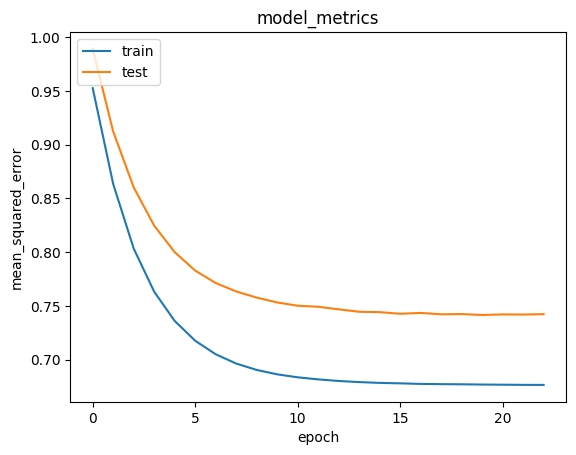

In [135]:
print('score MSE train: ', history.history['loss'][-1])
print('score MSE Validation: ', history.history['val_loss'][-1])
plt.plot(history.history['loss'][10:])
plt.plot(history.history['val_loss'][10:])
plt.title('model_metrics')
plt.ylabel('mean_squared_error')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

Code di bawah merupakan fungsi dan output dari rekomendari berdasarkan user rating (collaborative filtering)

In [141]:
def output_recommendation(x):
    
    movie_watched = throwback_df[throwback_df.newUserId == user_id]

    movie_not_watched = throwback_df[~throwback_df['newMovieId'].isin(movie_watched.newMovieId.values)][['title','rating','newMovieId']]

    movie_id_pred = model.predict(x)
    user_rate = movie_id_pred.flatten()

    top_rate_indices = user_rate.argsort()[-20:][::1]
    
    user_top_movie = movie_watched.sort_values(by='rating',ascending=False)['title'].values
    
    movie_rec = []
    counter_rec = 0
    for _ in top_rate_indices:
        movie_rec_title = movie_not_watched[movie_not_watched['newMovieId'] == _]['title'].unique()
        if movie_rec_title.size != 0 and counter_rec <= 10:
            movie_rec.append(movie_rec_title[0])
            counter_rec += 1
    
    print("recommendation for user_id: ",user_id)
    print("="*20)
    print("top 3 movie by user: ")
    counter_user = 0
    for i in user_top_movie:
        counter_user += 1
        if counter_user <= 3:
            print(i)
            
    print("="*20)
    print("recommendation by system:")
    
    for i in movie_rec:
        print(i)
        
    return None

In [142]:
user_id = throwback_df.newUserId.sample(1).iloc[0]
user_df_x = throwback_df[throwback_df['newUserId'] == user_id]
x = [user_df_x['newUserId'],user_df_x['newMovieId']]

output_recommendation(x)

recommendation for user_id:  228
top 3 movie by user: 
Leaving Las Vegas (1995)
Fargo (1996)
Willy Wonka & the Chocolate Factory (1971)
recommendation by system:
Babe (1995)
To Die For (1995)
Ace Ventura: When Nature Calls (1995)
Clueless (1995)
Sense and Sensibility (1995)
Pocahontas (1995)
Dangerous Minds (1995)
Copycat (1995)
Seven (a.k.a. Se7en) (1995)
Grumpier Old Men (1995)
American President, The (1995)
